In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Country-data.csv')
dictionary = pd.read_csv('data-dictionary.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
transform_columns = df.drop('country',axis=1).columns

In [7]:
model = scaler.fit(df.drop('country',axis=1))
scaled = model.transform(df.drop('country',axis=1))
scaled_df = pd.DataFrame(scaled,columns=transform_columns)

In [8]:
scaled_df['country'] = df.country
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen


In [9]:
scaled_df[scaled_df['exports']==scaled_df.exports.min()]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
107,0.300876,0.0,0.009944,0.0,0.02501,0.103965,0.684418,0.198738,0.007225,Myanmar


In [10]:
df[df.exports==df.exports.min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

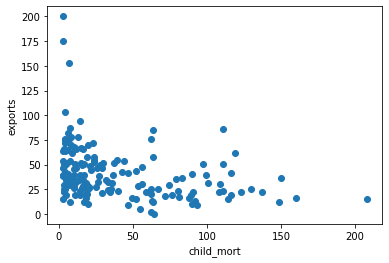

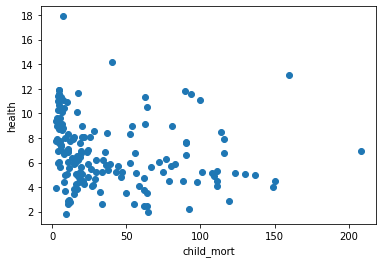

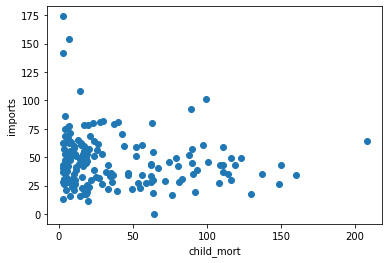

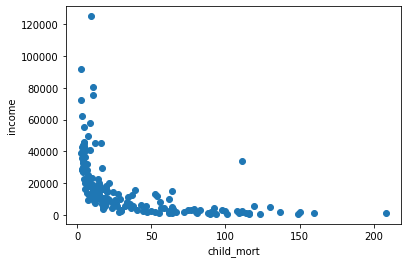

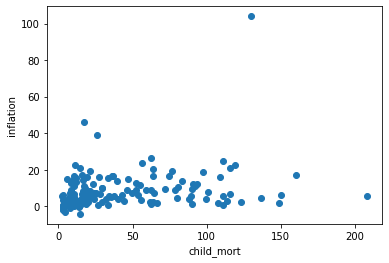

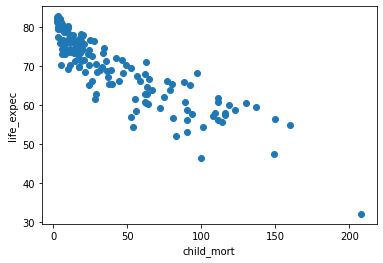

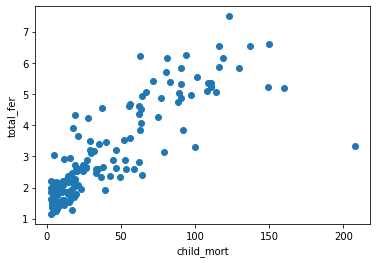

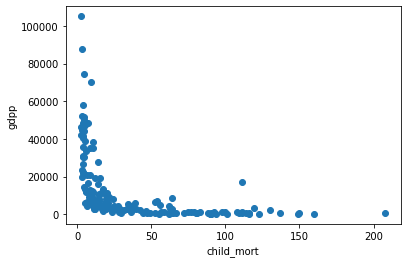

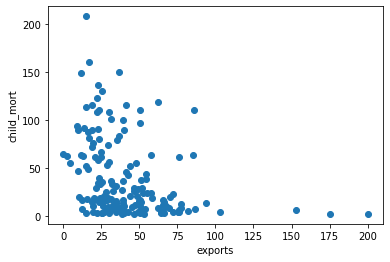

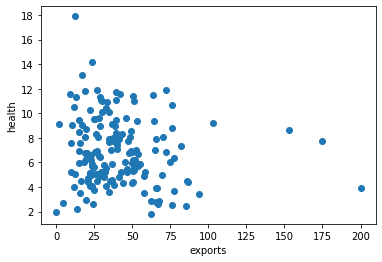

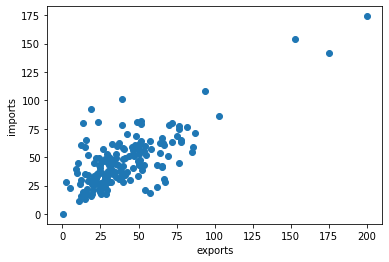

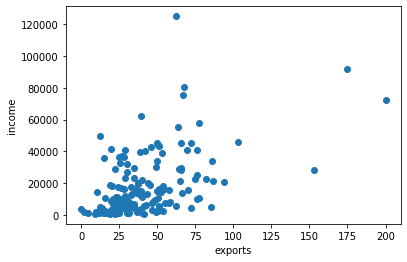

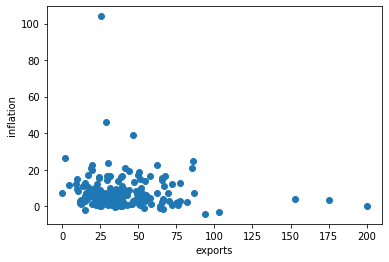

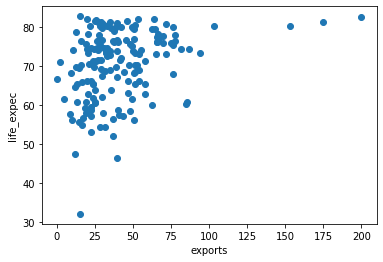

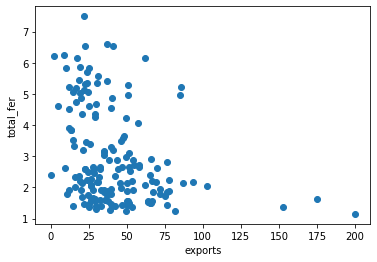

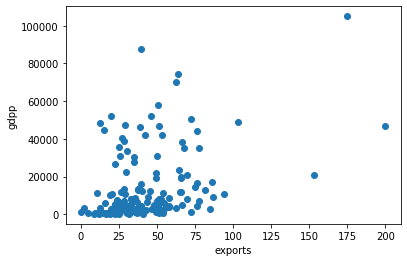

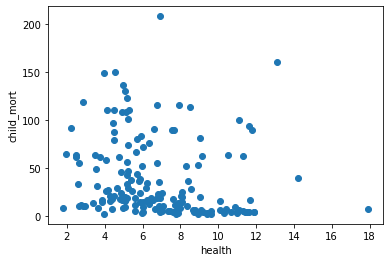

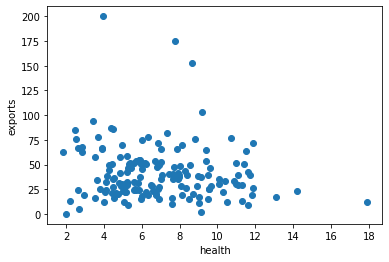

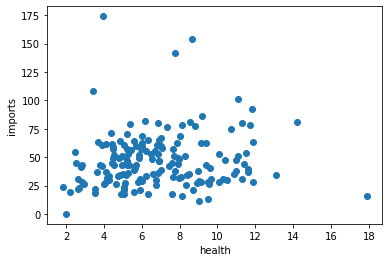

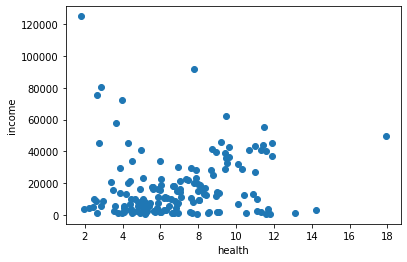

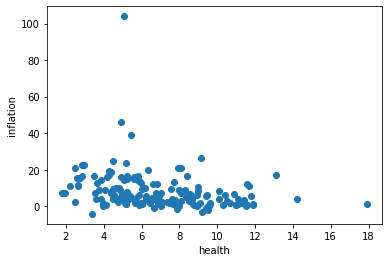

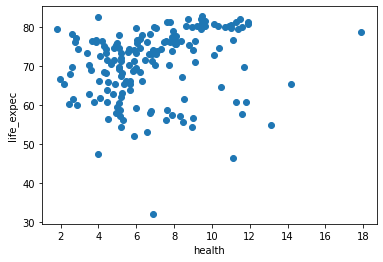

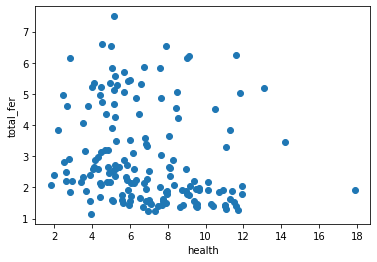

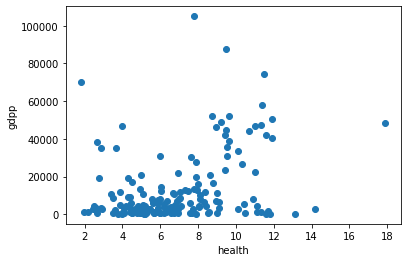

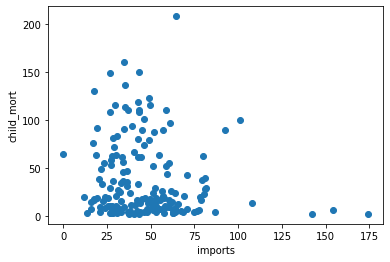

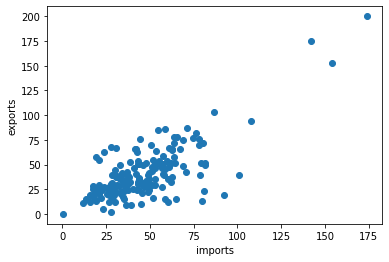

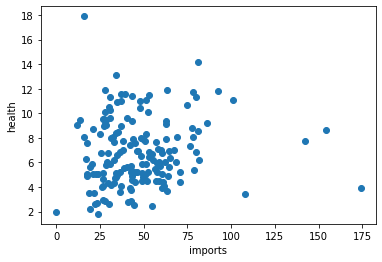

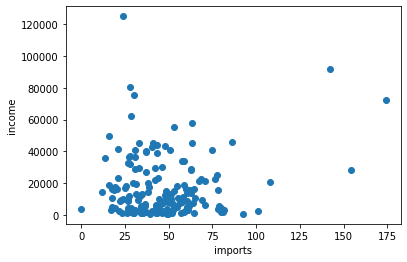

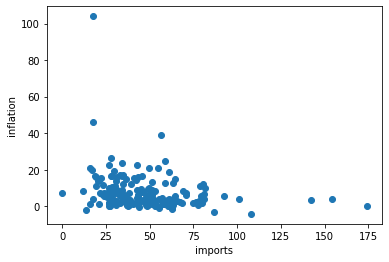

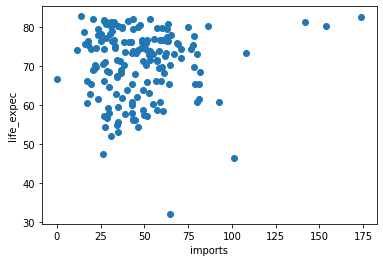

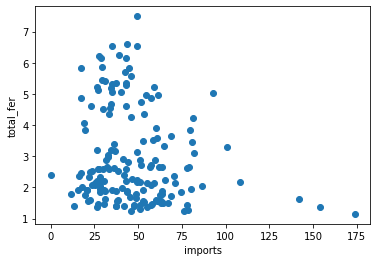

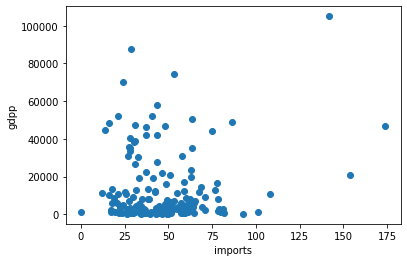

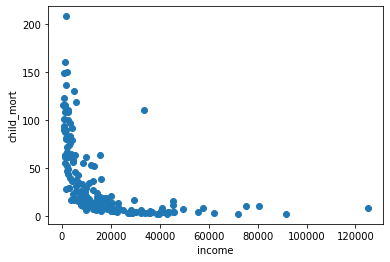

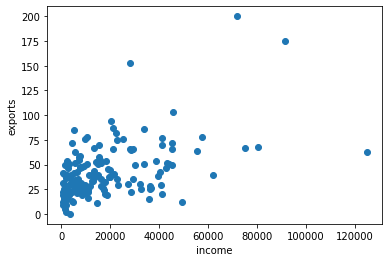

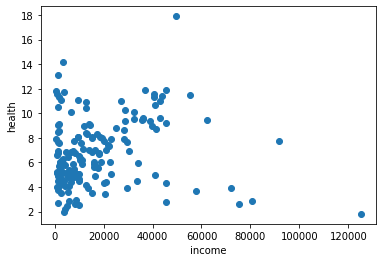

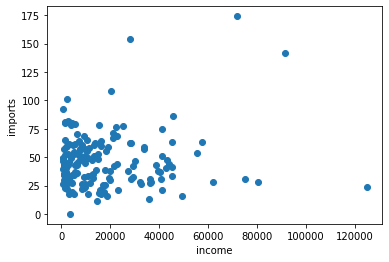

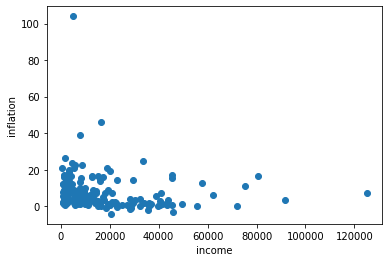

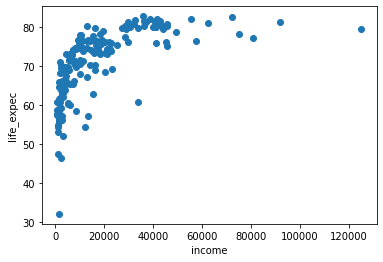

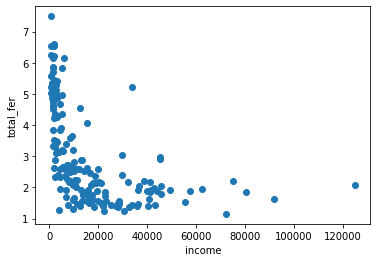

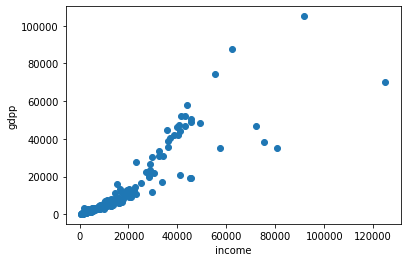

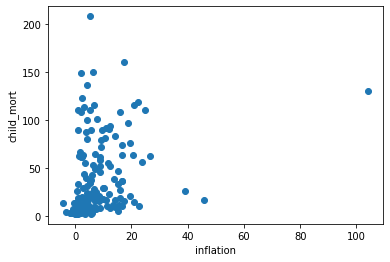

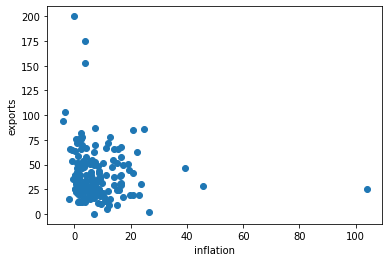

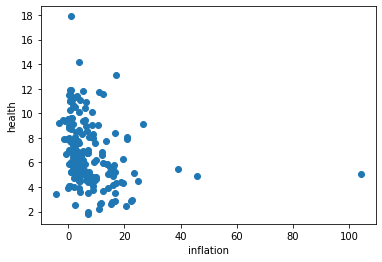

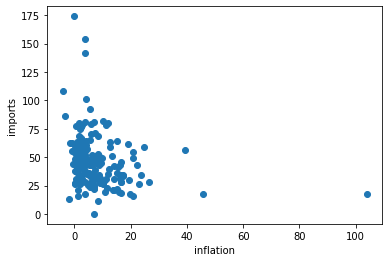

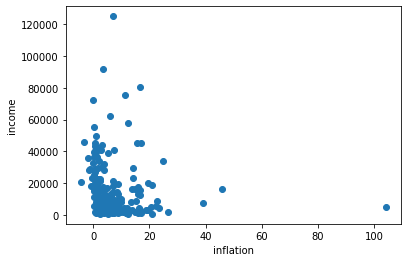

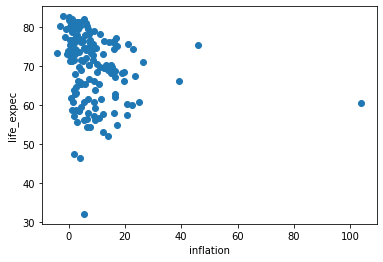

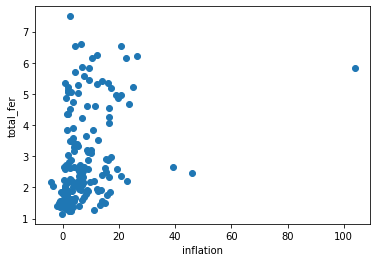

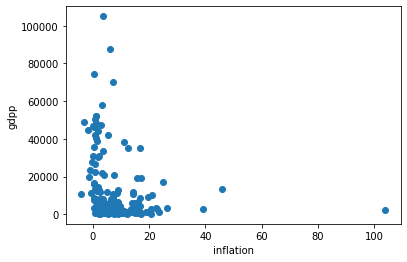

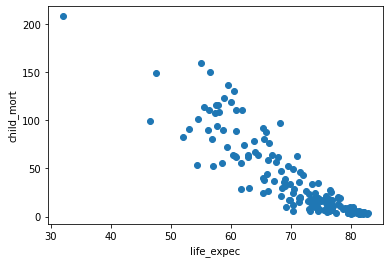

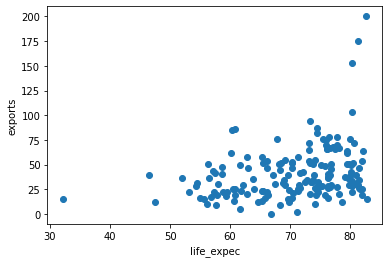

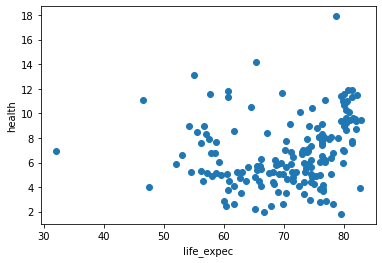

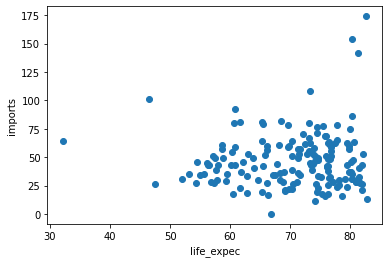

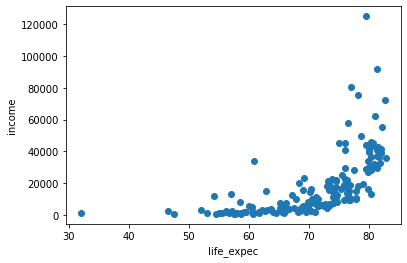

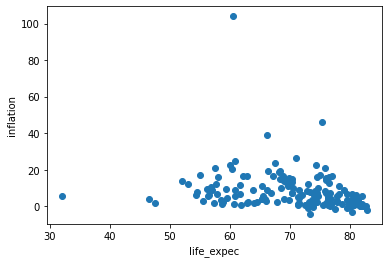

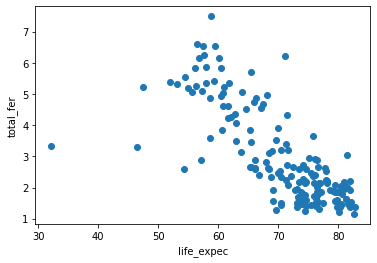

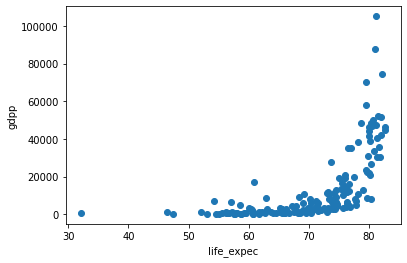

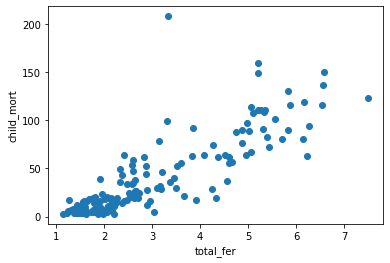

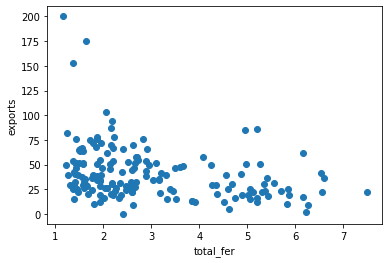

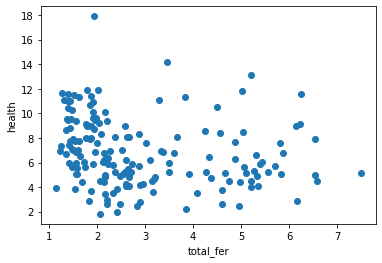

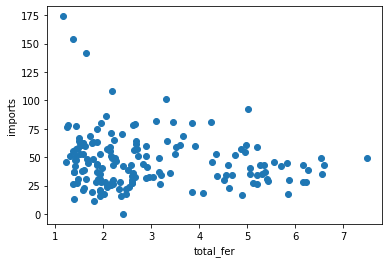

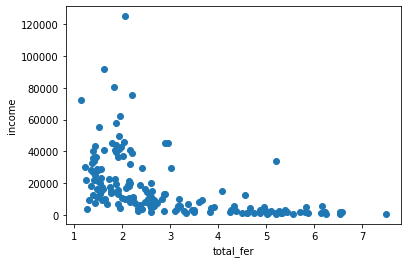

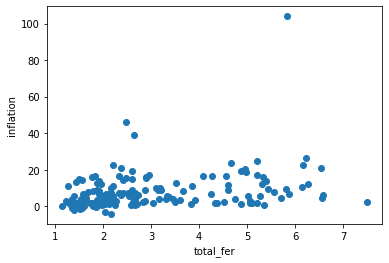

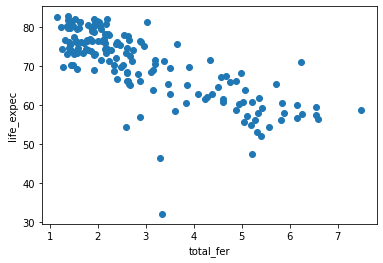

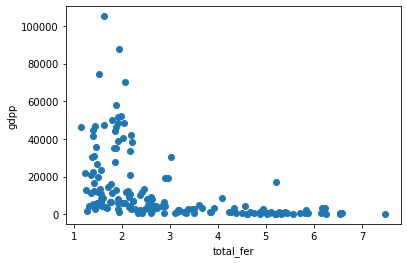

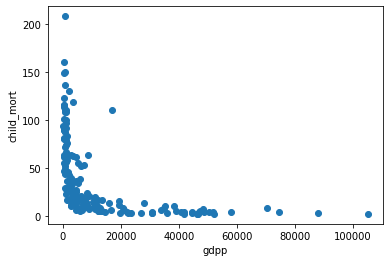

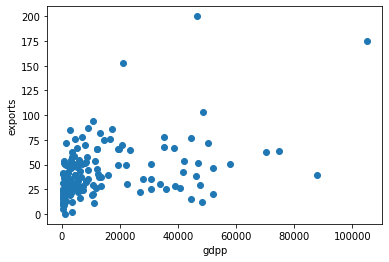

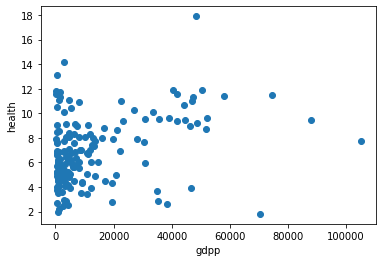

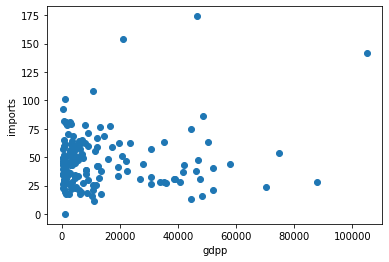

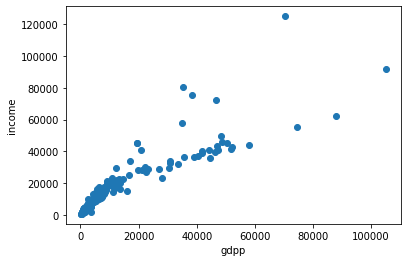

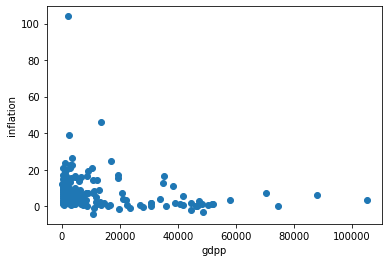

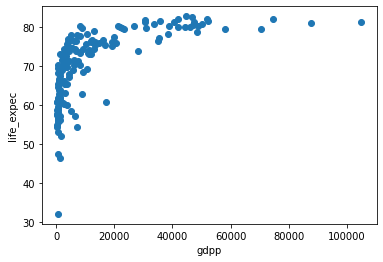

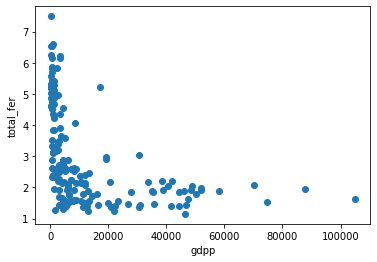

In [12]:
for i in transform_columns:
    for j in transform_columns:
        if i==j:
            pass
        else:
            plt.scatter(df[i],df[j])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

In [13]:
possible = [['child_mort','health'],['child_mort','imports'],['total_fer','child_mort'],['health','exports'],['exports','total_fer'],['health','inflation'],['total_fer','health'],['total_fer','imports'],['life_expec','income'],['inflation','total_fer'],]

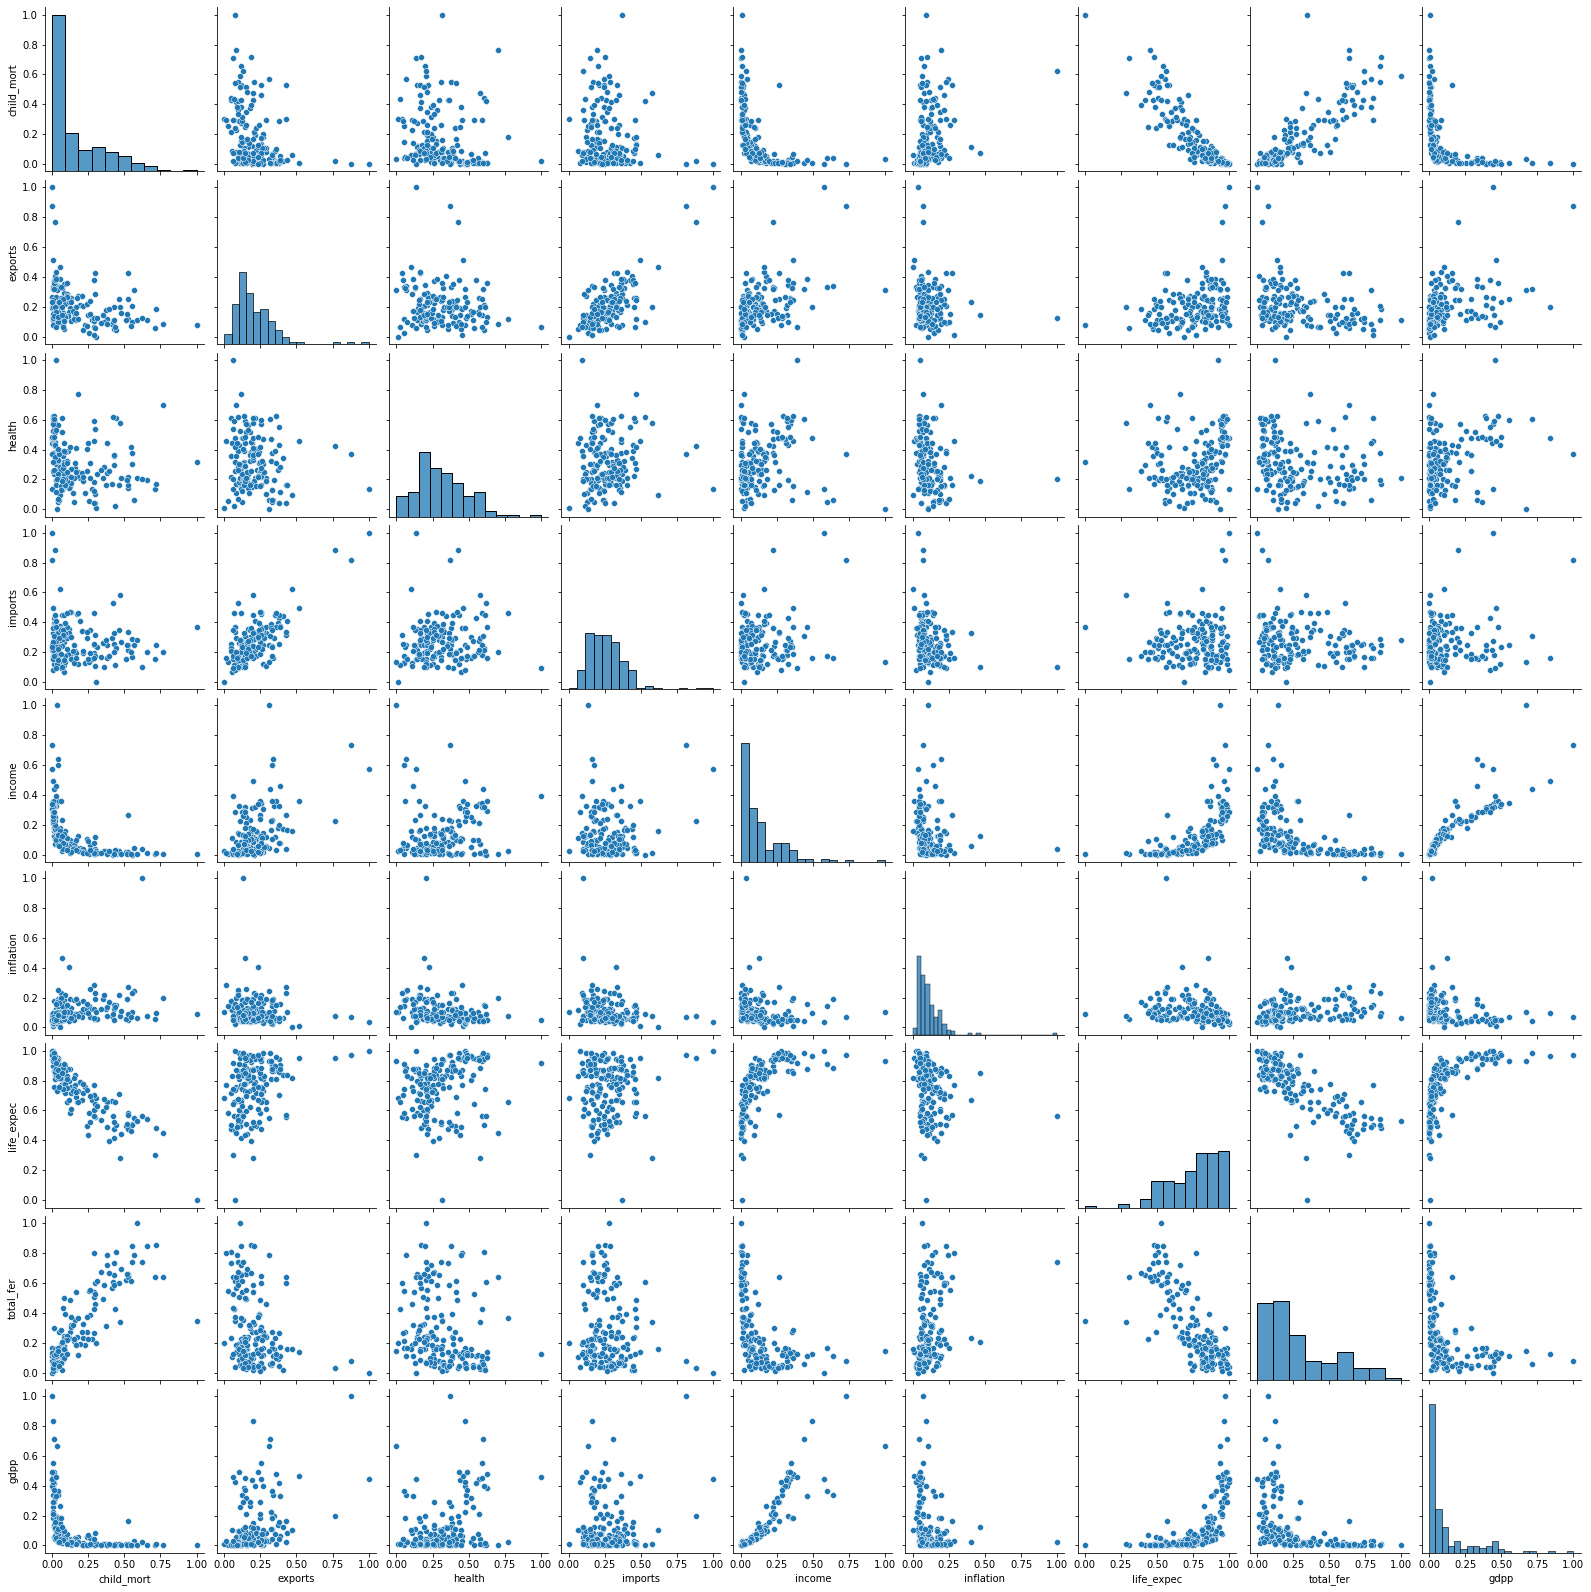

In [14]:
import seaborn as sns
sns.pairplot(scaled_df)

In [15]:
from sklearn.cluster import KMeans

In [16]:
check =[['exports','total_fer'],['life_expec','total_fer']]
sse = []
for i in check:
    res = []
    for k in range(1,10):
        
        km = KMeans(n_clusters=k)
        km.fit(scaled_df[[i[0],i[1]]])
        res.append(km.inertia_)
        
    sse.append(res)

In [17]:
sse

[[12.586204456519141,
  4.774684133803568,
  3.395993204109385,
  2.5072728077738,
  1.8486792539891266,
  1.4788752029313896,
  1.2452498452745928,
  1.0456137236421792,
  0.865495401547551],
 [14.571883404013965,
  4.05250845398006,
  2.7777395977949526,
  2.2053182687075097,
  1.7370383525090913,
  1.4349263506347958,
  1.217554368153065,
  1.0107478970823325,
  0.8747578555843646]]

In [18]:
scaled_df.total_fer

0      0.736593
1      0.078864
2      0.274448
3      0.790221
4      0.154574
         ...   
162    0.370662
163    0.208202
164    0.126183
165    0.555205
166    0.670347
Name: total_fer, Length: 167, dtype: float64

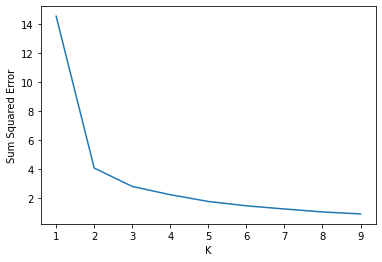

In [20]:
plt.xlabel('K')
plt.ylabel('Sum Squared Error')
plt.plot(range(1,10),sse[1])

In [21]:
km = KMeans(n_clusters=2)
km.fit(scaled_df[['exports','total_fer']])

KMeans(n_clusters=2)

In [22]:
y_pred = km.fit_predict(scaled_df[['exports','total_fer']])

In [23]:
scaled_df['cluster_pred_1'] = y_pred
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_pred_1
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda,0
...,...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu,0
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela,0
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam,0
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen,1


In [24]:
km = KMeans(n_clusters=2)
km.fit(scaled_df[['life_expec','total_fer']])
y_pred = km.fit_predict(scaled_df[['life_expec','total_fer']])

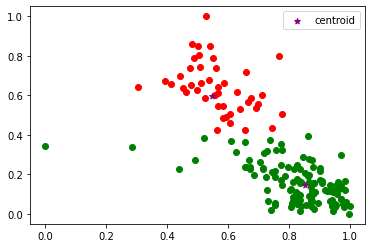

In [25]:
df1 = scaled_df[scaled_df.cluster_pred_1==0]
df2 = scaled_df[scaled_df.cluster_pred_1==1]
plt.scatter(df1.life_expec,df1['total_fer'],color='green')
plt.scatter(df2.life_expec,df2['total_fer'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [26]:

scaled_df['cluster_pred_2'] = y_pred
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_pred_1,cluster_pred_2
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan,1,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania,0,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria,0,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola,1,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu,0,1
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela,0,0
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam,0,0
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen,1,1


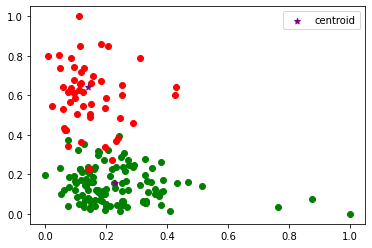

In [27]:
km = KMeans(n_clusters=2)
km.fit(scaled_df[['exports','total_fer']])
y_pred = km.fit_predict(scaled_df[['exports','total_fer']])

df1 = scaled_df[scaled_df.cluster_pred_2==0]
df2 = scaled_df[scaled_df.cluster_pred_2==1]
plt.scatter(df1.exports,df1['total_fer'],color='green')
plt.scatter(df2.exports,df2['total_fer'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [28]:
km = KMeans(n_clusters=3)
km.fit(scaled_df[['exports','total_fer']])
y_pred = km.fit_predict(scaled_df[['exports','total_fer']])
scaled_df['cluster_pred_3'] = y_pred
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_pred_1,cluster_pred_2,cluster_pred_3
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan,1,1,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania,0,0,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria,0,0,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola,1,1,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu,0,1,0
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela,0,0,0
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam,0,0,2
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen,1,1,1


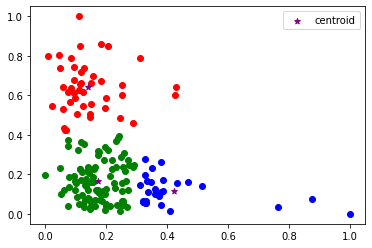

In [29]:
df1 = scaled_df[scaled_df.cluster_pred_3==0]
df2 = scaled_df[scaled_df.cluster_pred_3==1]
df3 = scaled_df[scaled_df.cluster_pred_3==2]
plt.scatter(df1.exports,df1['total_fer'],color='green')
plt.scatter(df2.exports,df2['total_fer'],color='red')
plt.scatter(df3.exports,df3['total_fer'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()